### Monte Carlo Simulations of Particle Diffusion and Wavefunctions

A particle confined in a box, either in one or two dimensions, exhibits quantized behavior which is described by its wavefunction. These systems serve as idealized models that allow us to explore the core principles of quantum mechanics and diffusion.

In this context, the Monte Carlo random walk offers a computational tool to simulate and visualize the dynamics of particles. By performing random steps within a constrained environment, Monte Carlo simulations can model the probabilistic nature of particle motion. 

In a quantum setting, these random walks are complemented by the wavefunction, which determines the probability of finding a particle at a given position. The integration of Monte Carlo methods with quantum mechanical principles allows for an understanding and visualization of how quantum states evolve in space, and how particle diffusion can be modeled in different dimensional settings. This approach can allow us to model diffusion processes with different boundary conditions.

#### Background

Considering a model in 1D:

For a particle in a box, the quantum mechanical wavefunction describes the probability amplitude of finding the particle at a given position. In the 1D case, the wavefunction is [[1]](#References):

$\psi(x,n,L)=\sqrt{\frac{2}{L}}sin(\frac{n \pi x}{L})$

where

$ x$: position

$n$: quantum number

$L$: length of the box

This equation models the wavefunction of a particle confined within a 1D box with walls at $x=0$ and $x=L$. The sine function is used because it satisfies the boundary conditions (the wavefunction is zero at the walls).

Probability distribution for a 1D box:

$|\psi(x,n,L)|^2=(\sqrt{\frac{2}{L}}sin(\frac{n \pi x}{L}))^2=\frac{2}{L}sin^2(\frac{n \pi x}{L})$

The probability density helps visualize where the particle has the highest chance to be found.


We can take these equations defined in 1 dimension and expand them out into a 2 dimensional context.

Wavefunction for a 2D box:

$\psi_{2}(x,y,n_x,n_y,L)=\sqrt{\frac{8}{L^2}}sin(\frac{n_x \pi x}{L})sin(\frac{n_y \pi y}{L})$

where $\psi$ is the wavefunction for a particle in a LxL box where $n_x$ and $n_y$ are quantum numbers in the x and y direction

This equation models the wavefunction for a particle confined to a 2D rectangular region, where the wavefunction satisfies boundary conditions at the edges. The product of two sin functions represent the particle's motion in both the x and y directions.

Probability distribution for a 2D box:

$|\psi_{2}(x,y,n_x,n_y,L)|^2=(\sqrt{\frac{8}{L^2}}sin(\frac{n_x \pi x}{L})sin(\frac{n_y \pi y}{L}))^2={\frac{8}{L^2}}sin^2(\frac{n_x \pi x}{L})sin^2(\frac{n_y \pi y}{L})$

The mean squared displacement is a measure of how far the particles have traveled over time and is represented by:

$MSD(t)=\langle |r(t)-r(0)t|^2 \rangle= \langle ((\Delta x)^2+ (\Delta y)^2 \rangle$

where 
$r(t)$ and $r(0)$ are the positions of the particle at time t the intial time. The displacement is computed over all particles, and the MSD measures how far particles have traveled from their initial positions as a function of time.

There is also an analytical solution, assumping simple diffusion:

$MSD(t)=4Dt$,

where $D$ is the diffusion coefficient, $D=\frac{s^2}{4}$, and $s$ is the step size

The analytical MSD is used to compare with the simulated MSD to ensure the validity of the random walk model. In an ideal diffusion process, the MSD grows linearly with time and comparing these can show the accuracy of the simulation. [[3]](#References)

#### Assumptions for Models

In a 1D and 2D Model, the particle is confined to a perfectly rigid box with reflecting boundaries such that the particle can't escape the box and bounces back when it hits the walls. The particle is in a quantum state with quantized energy levels. The wavefunction is normalized, meaning the total probability of finding the particle within the box adds up to 1.


In the Monte Carlo simulation, the particles move randomly according to a uniform distribution, with steps of size determined by the step size parameter. The random walk in the model assumes that each step is independent, and there are no correlations between steps. In the 2D case, the particles move in all directions with equal probability. The random walk is modeled as a diffusion process, where the particles undergo simple diffusion and their movement has equal probability every time. The time steps are assumed to be small enough that the step size is much smaller than the length of the box, ensuring the MSD grows linearly with time. The particles are also assumed to be identical.

#### Code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

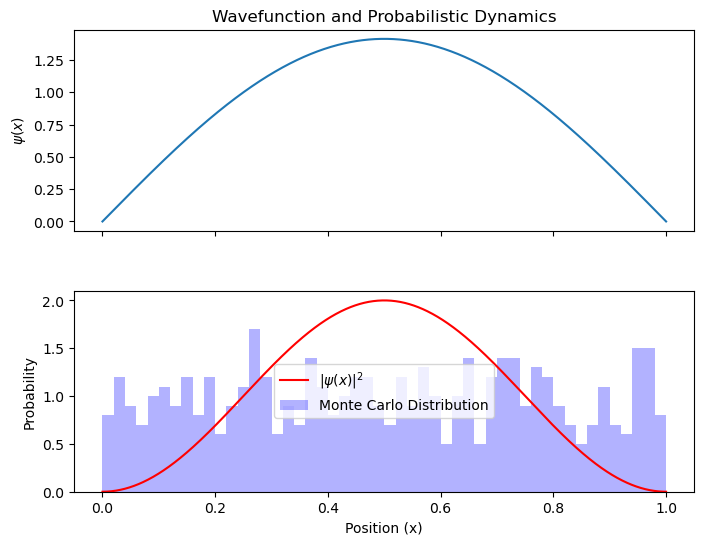

In [140]:
#define the wavefunction
def psi(x, n, L):
    return np.sqrt(2 / L) * np.sin(n * np.pi * x / L)

#Monte Carlo random walk in a 1D box
def monte_carlo_walk(L, n_steps, n_particles):
    positions = np.random.uniform(0, L, size=n_particles)  #initialize particles randomly
    trajectories = [positions.copy()]

    for _ in range(n_steps):
        #random walk
        steps = np.random.uniform(-0.005 * L, 0.005 * L, size=n_particles)  #larger step size
        positions += steps
        positions = np.clip(positions, 0, L)  #reflect particles off the walls
        trajectories.append(positions.copy())

    return np.array(trajectories)

#parameters
L = 1.0  #length of the box
n = 1  #quantum number
n_steps = 200  #number of steps
n_particles = 500 #number of particles

#generate rajectories
trajectories = monte_carlo_walk(L, n_steps, n_particles) #[2](References)

#create plots
x = np.linspace(0, L, 1000)
y_wave = psi(x, n, L)
y_prob = y_wave**2

#plot the wavefunction and probability distribution
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(8, 6))
plt.subplots_adjust(hspace=0.3)

#wavefunction plot
ax1.plot(x, y_wave, label=r'$\psi(x)$')
ax1.set_title('Wavefunction and Probabilistic Dynamics')
ax1.set_ylabel(r'$\psi(x)$')

#probability plot with the final m.c. distribution
ax2.plot(x, y_prob, label=r'$|\psi(x)|^2$', color='red')
ax2.hist(trajectories[-1], bins=50, range=(0, L), density=True, alpha=0.3, color='blue', label='Monte Carlo Distribution')
ax2.set_xlabel('Position (x)')
ax2.set_ylabel('Probability')
ax2.legend()

plt.show()


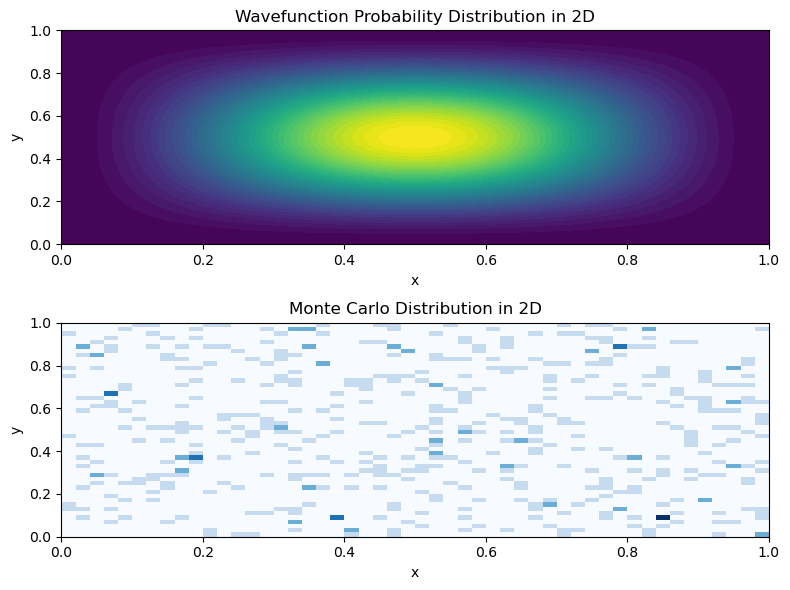

In [132]:
#define the 2D wavefunction
def psi_2d(x, y, n_x, n_y, L):
    return np.sqrt(8 / (L**2)) * np.sin(n_x * np.pi * x / L) * np.sin(n_y * np.pi * y / L)

# Monte Carlo random walk in a 2D box
def monte_carlo_walk_2d(L, n_steps, n_particles):
    positions = np.random.uniform(0, L, size=(n_particles, 2))  #initialize particles randomly
    trajectories = [positions.copy()]

    for _ in range(n_steps):
        # Random walk in 2D
        steps = np.random.uniform(-0.005 * L, 0.005 * L, size=(n_particles, 2))  #larger step size
        positions += steps
        positions = np.clip(positions, 0, L)  #reflect particles off the walls
        trajectories.append(positions.copy())

    return np.array(trajectories)

#parameters
L = 1.0  #length of the box
n_x, n_y = 1, 1  #quantum numbers in x and y directions
n_steps = 200  #number of steps
n_particles = 500  #number of particles

#generate trajectories
trajectories = monte_carlo_walk_2d(L, n_steps, n_particles)

#plots
x = np.linspace(0, L, 1000)
y = np.linspace(0, L, 1000)
X, Y = np.meshgrid(x, y)
Z_wave = psi_2d(X, Y, n_x, n_y, L)
Z_prob = Z_wave**2

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))  #2D plots

#wavefunction plot
ax1.contourf(X, Y, Z_prob, levels=50, cmap='viridis')
ax1.set_title('Wavefunction Probability Distribution in 2D')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

#probability distribution with the final Monte Carlo distribution
ax2.hist2d(trajectories[-1][:, 0], trajectories[-1][:, 1], bins=50, range=[[0, L], [0, L]], density=True, cmap='Blues')
ax2.set_title('Monte Carlo Distribution in 2D')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.tight_layout()
plt.show()


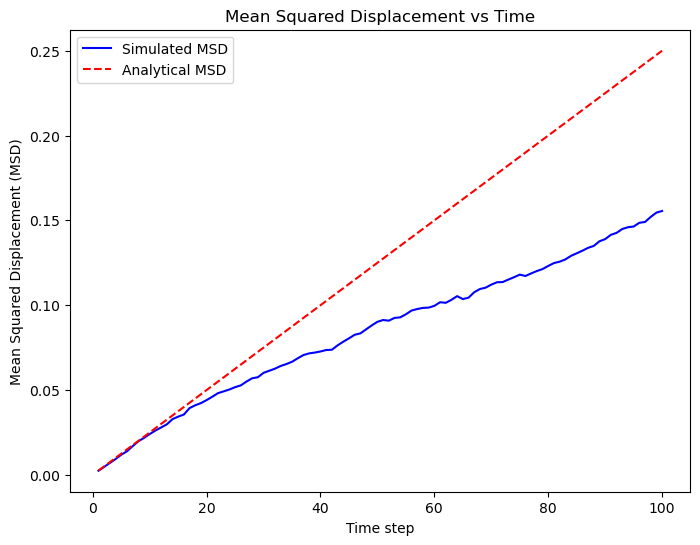

In [127]:
#Monte Carlo random walk
def monte_carlo_walk_2d(L, n_steps, n_particles, step_size=0.05, barriers=None):
    #iitialize particle positions randomly in the 2D box
    positions = np.random.uniform(0, L, size=(n_particles, 2))  #each particle has an x and y position
    trajectories = [positions.copy()]
    
    for _ in range(n_steps):
        #random walk in both x and y directions
        angles = np.random.uniform(0, 2 * np.pi, size=n_particles)  #random direction for each particle
        steps = step_size * np.column_stack((np.cos(angles), np.sin(angles)))  #step size in x and y
        
        positions += steps
        positions = np.clip(positions, 0, L)  #reflect particles off the walls (boundary conditions)
        
        #apply barriers, if any
        if barriers is not None:
            for barrier in barriers:
                positions = apply_barrier(positions, barrier)
        
        trajectories.append(positions.copy())

    return np.array(trajectories)

#function to calculate the mean squared displacement
def calculate_msd(trajectories, initial_positions):
    msd = []
    for t in range(trajectories.shape[0]):
        #displacement from initial position
        displacement = trajectories[t] - initial_positions
        msd.append(np.mean(np.sum(displacement**2, axis=1)))  #average over all
    return np.array(msd)

#parameters
L = 1.0  #length of the box
n_steps = 100  #number of Monte Carlo steps
n_particles = 500  #nmber of particles
step_size = 0.05  #step size


trajectories = monte_carlo_walk_2d(L, n_steps, n_particles, step_size, barriers)

#calculate MSD
initial_positions = trajectories[0]
msd = calculate_msd(trajectories, initial_positions)

#adjust time array to match the msd length
time = np.arange(1, n_steps + 1)

#analytical model for comparison
D = step_size**2 / 4  #diffusion coefficient
msd_analytical = 4 * D * time  #expected msd

#plot the msd vs time and compare with the other model
plt.figure(figsize=(8, 6))
plt.plot(time, msd[1:], label='Simulated MSD', color='blue')  #exclude t=0 MSD
plt.plot(time, msd_analytical, label='Analytical MSD', color='red', linestyle='--')
plt.xlabel('Time step')
plt.ylabel('Mean Squared Displacement (MSD)')
plt.title('Mean Squared Displacement vs Time')
plt.legend()
plt.show()


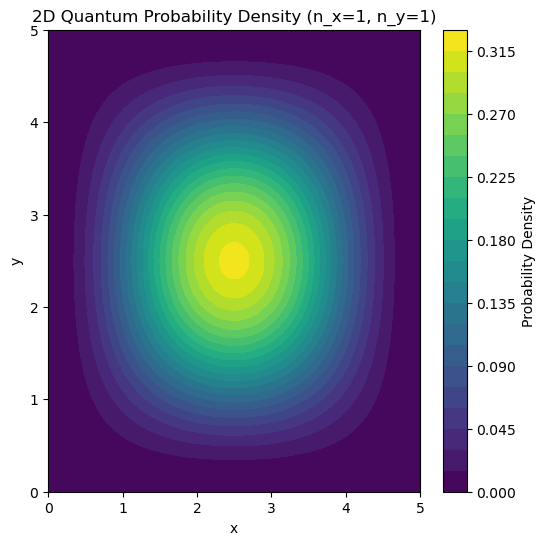

In [138]:
#define the wavefunction
def psi_2d(x, y, n_x, n_y, L):
    return np.sqrt(8 / (L**2)) * np.sin(n_x * np.pi * x / L) * np.sin(n_y * np.pi * y / L)

L = 5  #size of the box
n_x, n_y = 1, 1  #quantum numbers for the state
x = np.linspace(0, L, 100)
y = np.linspace(0, L, 100)
X, Y = np.meshgrid(x, y)


wavefunction_values = psi_2d(X, Y, n_x, n_y, L)
probability_density = np.abs(wavefunction_values)**2

# Plot the probability density
plt.figure(figsize=(6, 6))
plt.contourf(X, Y, probability_density, cmap="viridis", levels=30)
plt.colorbar(label="Probability Density")
plt.title(f"2D Quantum Probability Density (n_x={n_x}, n_y={n_y})")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

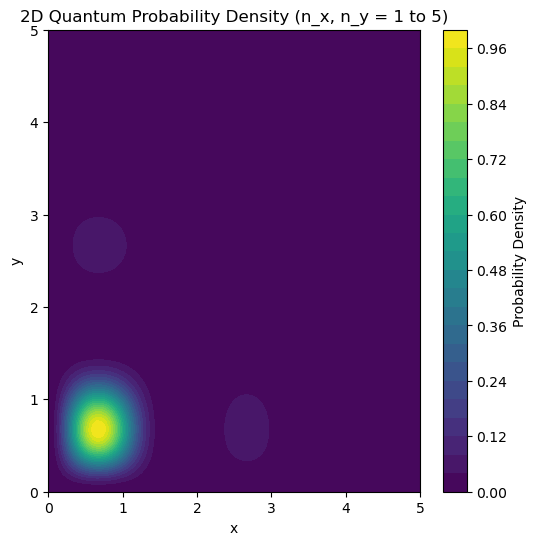

In [137]:
#define the 2D wavefunction for a given state
def psi_2d(x, y, n_x, n_y, L):
    return np.sqrt(2 / L) * np.sin(n_x * np.pi * x / L) * np.sqrt(2 / L) * np.sin(n_y * np.pi * y / L)

L = 5  #size of box
x = np.linspace(0, L, 100)
y = np.linspace(0, L, 100)
X, Y = np.meshgrid(x, y)

N = 5 #max quantum number

#initialize the total wavefunction
total_wavefunction = np.zeros(X.shape, dtype=complex)

#sum over all quantum states from 1 to N
for n_x in range(1, N+1):
    for n_y in range(1, N+1):
        total_wavefunction += psi_2d(X, Y, n_x, n_y, L)

#calculate the probability density
probability_density = np.abs(total_wavefunction)**2
prob_density_normalized = np.abs(total_wavefunction)**2 / np.max(np.abs(total_wavefunction)**2)


#plot probability density
plt.figure(figsize=(6, 6))
plt.contourf(X, Y, prob_density_normalized, cmap="viridis", levels=30)
plt.colorbar(label="Probability Density")
plt.title(f"2D Quantum Probability Density (n_x, n_y = 1 to {N})")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


#### Model Evaluations

- The combination of wavefunction and probability density with a Monte Carlo simulation provides a basis to see particle behavior from both a computational perspective.
  
-  Both the Monte Carlo simulation and the wavefunction models can be modified to accommodate different boundary conditions, particle interactions, and system complexities with no excessive modifications.

- The quantum model assumes idealized boundary conditions and doesn't consider time evolution. Similarly, the Monte Carlo model simplifies the particle movement to a randomized system, which may not fully capture all relevant dynamics in certain systems such as particle interactions and any external fields that would normally be present.
  
- Both the Monte Carlo simulations and the wavefunction evaluations can be computationally demanding, especially when simulating large systems or long time frames.
  
- Without considering the time evolution of the wavefunction, the quantum model does not provide a dynamic view of the particle's behavior, which may limit its applicability in situations involving time-dependent potentials or external forces.

The current models offers a solid foundation for studying quantum mechanical systems in confined spaces and simulating particle motion. However, they are limited by simplifying assumptions and lack of dynamic evolution. Future improvements could involve introducing time-dependent wavefunction evolution, incorporating more complex interactions, and improving the efficiency of the Monte Carlo simulations.

#### References 

1. Ling, S. J., Sanny, J., & Moebs, W. The Quantum Particle in a Box. University Physics Volume 3. https://pressbooks.online.ucf.edu/osuniversityphysics3/chapter/the-quantum-particle-in-a-box/ 
2. Nikolic, B. From Random Numbers to Monte Carlo. https://www.physics.udel.edu/~bnikolic/teaching/phys660/lectures/random.pdf 
3. Schwartz, M. Lecture 2: Diffusion. Statistical Mechanics, Spring 2021. https://scholar.harvard.edu/files/schwartz/files/2-diffusion_0.pdf 